# Import packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read data and data pre-processing

In [2]:
weather_raw = pd.read_csv('input_weather.csv')
windspeed_raw = pd.read_csv('output_windspeed.csv')
weather_data = np.array(weather_raw)
wind_data=np.array(windspeed_raw)

train_data = weather_data[0:49239,:]
train_labels = wind_data[0:49239,:]

test_data = weather_data[49239:,:]
test_labels = wind_data[49239:,:]

print("Training set: {}".format(train_data.shape))  # 49239 examples, 8 features
print("Testing set:  {}".format(test_data.shape))   # 12310 examples, 8 features

Training set: (49239, 8)
Testing set:  (12310, 8)


In [10]:
column_names = ['Summary', 'Rainfall', 'T', 'Apparent_T', 'Humidity', 'WBearing', 'Visibility', 'Pressure']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,Summary,Rainfall,T,Apparent_T,Humidity,WBearing,Visibility,Pressure
0,120.0,201.0,9.355556,7.227778,0.86,259.0,15.8263,1015.630005
1,118.0,201.0,9.377778,9.377778,0.89,204.0,14.9569,1015.940002
2,120.0,201.0,8.288889,5.944445,0.83,269.0,15.8263,1016.409973
3,118.0,201.0,8.755555,6.977778,0.83,259.0,15.8263,1016.510010
4,120.0,201.0,9.222222,7.111111,0.85,258.0,14.9569,1016.659973


In [11]:
# Standardization
mean = train_data.mean(axis=0,dtype=float)
std  = train_data.std(axis=0,dtype=float)

train_data = (train_data - mean)/ std
test_data = (test_data - mean)/ std

print(train_data.shape,test_data.shape)

(49239, 8) (12310, 8)


In [12]:
print(train_labels[0:10])  # Display first 10 entries

[[14.2646]
 [ 3.9284]
 [14.1036]
 [11.0446]
 [13.9587]
 [12.3648]
 [14.1519]
 [11.3183]
 [12.5258]
 [17.5651]]


# Build the model

In [13]:
params_rfr = {'n_estimators':1000,
              'criterion':'mse', 
              'max_depth': 10,
              'bootstrap':True,
              'max_features':None}

In [14]:
model = RandomForestRegressor(**params_rfr)

In [15]:
%%time
model.fit(train_data, train_labels)


<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 3min 8s, sys: 743 ms, total: 3min 9s
Wall time: 3min 10s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Evaluate the prediction

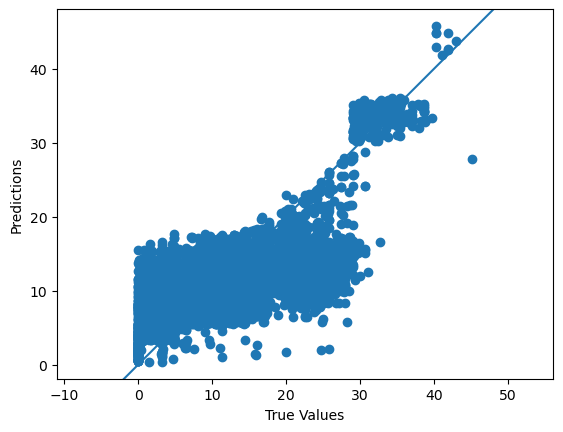

In [16]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

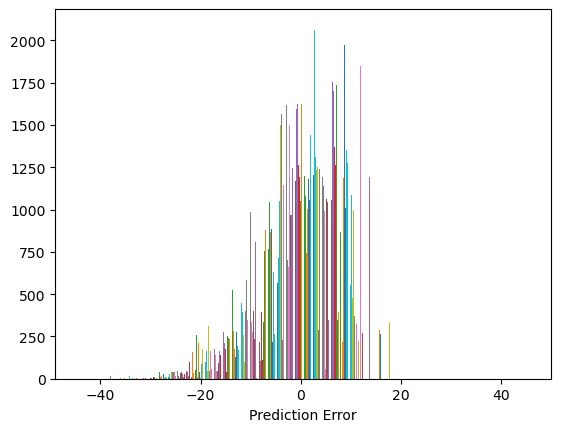

In [17]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()

In [18]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 25.67463553553601


In [19]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

0.47223418461962885

In [20]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

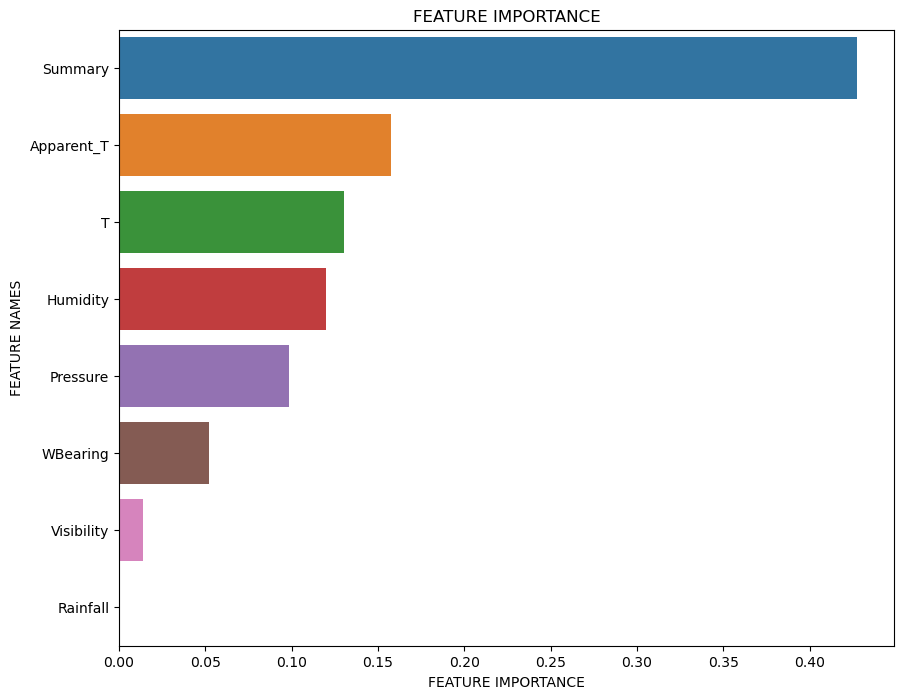

In [21]:
plot_feature_importance(model.feature_importances_, df.columns)

In [24]:
test_labels_1d = test_labels.reshape(test_labels.shape[0],)

In [26]:
np.corrcoef(test_labels_1d,test_predictions)[0,1]

0.6894124179866631